# Packages

In [1]:
from typing import List

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install sweetviz

# sweetviz is optional for a double check, uncomment and install with caution
import sweetviz as sv

## print requirments

In [ ]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.5.1
numpy==1.22.3
pandas==1.4.2
seaborn==0.13.2
sweetviz==2.3.1


# Functions

In [ ]:
# Data Cleaning and validation
def load_data_from(file_path: str) -> pd.DataFrame:
    """
    Load data from single file path, we won't specify file extension here since we only have .csv files.
    """
    if isinstance(file_path, str):
        try:
            df = pd.read_csv(file_path)
        except FileNotFoundError:
            raise FileNotFoundError(f"The file at path '{file_path}' was not found.")
    else:
        raise ValueError("Input must be a string or a list of strings representing file paths.")
    return df

def count_nulls(dataframes) -> str:
    """
    Display null valuess in each column for any number of dataframes
    """
    if isinstance(dataframes, pd.DataFrame):
        dataframes = [dataframes]
    if not isinstance(dataframes, list) or not all(isinstance(df, pd.DataFrame) for df in dataframes):
        raise ValueError("Input must be a pandas DataFrame or a list of pandas DataFrames.")

    for i, df in enumerate(dataframes):
        if not isinstance(df, pd.DataFrame):
            print(f"Argument {i+1} is not a valid DataFrame.")
        else:
            null_counts = df.isnull().sum()
        print(f"Null values in DataFrame {i+1}:\n{null_counts}\n")
        
def get_column_names(dataframes: List[pd.DataFrame]) -> str:
    """
    Get list(s) of strings of all column names for any number of dataframes 
    """
    for i, df in enumerate(dataframes):
        if not isinstance(df, pd.DataFrame):
            print(f"Argument {i+1} is not a valid DataFrame.")
        else:
            columns = df.columns.tolist()
        print(f"List of columns for DataFrame {i+1}: {columns}")
        
def print_datatypes(dataframes) -> str:
    """
    Print datatypes for any number of dataframes
    """
    if isinstance(dataframes, pd.DataFrame):
        dataframes = [dataframes]
    if not isinstance(dataframes, list) or not all(isinstance(df, pd.DataFrame) for df in dataframes):
        raise ValueError("Input must be a pandas DataFrame or a list of pandas DataFrames.")

        
    for i, df in enumerate(dataframes):
        if not isinstance(df, pd.DataFrame):
            print(f"Argument {i+1} is not a valid DataFrame.")
        else:
            datatypes = df.dtypes
        print(f"Datatypes for DataFrame {i+1}:\n{datatypes}\n")
             
def check_non_negative(field: pd.Series) -> str:
    """
    Check if a numerical field contains any negative values.
    """
    if not isinstance(field, pd.Series):
        print(f"Argument {field.name} is not a valid column.")
        return

    if not pd.api.types.is_numeric_dtype(field):
        print(f"Argument {field.name} is not numeric (integer or float).")
        return

    if (field >= 0).all():
        print(f"{field.name} has no negative values.")
    else:
        print(f"{field.name} has negative values. Investigate further.")
             
def get_numeric_columns(dataframes) -> List[str]:
    """
    Takes a list of pandas DataFrames and returns a list of column names that are numeric.
    """
    if isinstance(dataframes, pd.DataFrame):
        dataframes = [dataframes]
    
    numeric_columns = []  
    for df in dataframes:
        numeric_cols = df.select_dtypes(include=['number']).columns
        for col in numeric_cols:
            numeric_columns.append(df[col])
 
    return list(numeric_columns)

def check_duplicates(dataframes):
    """
    Checks for duplicate rows
    """
    if isinstance(dataframes, pd.DataFrame):
        dataframes = [dataframes]
    if not isinstance(dataframes, list) or not all(isinstance(df, pd.DataFrame) for df in dataframes):
        raise ValueError("Input must be a pandas DataFrame or a list of pandas DataFrames.")

    for i, df in enumerate(dataframes):
        if not isinstance(df, pd.DataFrame):
            print(f"Item at index {i+1} is not a DataFrame.")
            continue

        duplicates = df[df.duplicated(keep=False)]
        if not duplicates.empty:
            print(f"DataFrame {i+1} contains duplicates:")
            print(duplicates)
        else:
            print(f"DataFrame {i+1} has no duplicate rows.")

def generate_sweetviz_report(dataframes):
    """ 
    Generates Sweetviz data reports for any number of Dataframes
    """
    if isinstance(dataframes, pd.DataFrame):
        dataframes = [dataframes]  
    if not isinstance(dataframes, list) or not all(isinstance(df, pd.DataFrame) for df in dataframes):
        raise ValueError("Input must be a pandas DataFrame or a list of pandas DataFrames.")

    for i, df in enumerate(dataframes):
        report = sv.analyze(df)
        report_name = f"report_{i + 1}.html"
        report.show_html(report_name)
        print(f"Sweetviz report generated: {report_name}")

# utils
def check_and_divide(number: int):
    """
    Check if a number is even or odd, and output factors accordingly, add 1 if there is a remainder after dividing by 3.
    We can use this to keep subplots organized.
    """
    if number == 1:
        factors = (1,1)
        return factors
    elif number % 2 == 0:  # even
        divided_by_2 = number // 2
        factors = (2,divided_by_2)
        return factors
    else:  
        divided_by_3 = number // 3
        if number % 3 == 0:
            factors = (3,divided_by_3)
            return factors
        else:
            divided_by_3_plus_1 = divided_by_3 + 1
            factors_divided_plus_1 = (3, divided_by_3_plus_1)
            return factors_divided_plus_1
        
# Visualizations
def create_bivariate_histplot(dataframe: pd.DataFrame, 
                               x_col: str, 
                               y_col: str, 
                               set_discrete: tuple, 
                               set_log_scale: tuple):
    """ 
    Create subplots of bivariate histplots for non-binary columns
    
    Parameters:
    - dataframe: a single dataframe for the data used in the subplots
    - x_col: column used for x-axis
    - y_col: column used for y-axis
    - set_discrete: tuple containing discrete specification
    - set_log_scale: tuple containing log_scale specification
    """
    if x_col not in dataframe.columns or y_col not in dataframe.columns:
        raise ValueError(f"Columns {x_col} or {y_col} not found in DataFrame.")

    sns.histplot(dataframe, x=x_col, y=y_col, bins=30, discrete=set_discrete, log_scale=set_log_scale, cbar=True, cbar_kws=dict(shrink=.75))
    
def create_histplots(dataframe: pd.DataFrame, 
                     columns, 
                     num_rows_for_plots, 
                     num_cols_for_plots):
    """ 
    Create subplots of bivariate histplots for non-binary columns
    
    Parameters:
    - dataframe: a single dataframe for the data used in the subplots
    - columns: columns of which we want to examine the distributions
    - num_rows_for_plots: number of rows for subplots
    - num_cols_for_plots: number of columns for subplots
    """
    if isinstance(columns, str):
        columns = [columns]
    if not isinstance(columns, list) or not all(isinstance(column, str) for column in columns):
        raise ValueError("Input must be a column name or a list of column names.")
    
    fig, axs = plt.subplots(nrows=num_rows_for_plots, ncols=num_cols_for_plots, figsize=(8,5))
    for i, column in enumerate(columns):
        plt.subplot(2,2, i + 1)
        sns.histplot(dataframe[column], color='#FF781F', kde=True, bins=25)
        
        max_value = dataframe[column].max()
        plt.xlim(0, max_value)
        max_y = dataframe[column].value_counts().max()
        plt.ylim(0, max_y)

        plt.title(f"Distribution: {column}")

    plt.tight_layout()
    plt.show()

# Transformation and feature engineering
def define_ordered_day_of_week_column(dataframe: pd.DataFrame, 
                                      timestamp_column: str, 
                                      new_column_name: str):
    """
    Create a new categorical column for strings of day of week using existing timestamp column
    """
    dataframe[new_column_name] = dataframe[timestamp_column].dt.day_name()
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # hard code order, week starts on Monday
    dataframe[new_column_name] = pd.Categorical(dataframe[new_column_name], categories=order, ordered=True)
    return dataframe[new_column_name]

# Data Pre-processing and Quality checks

## Load Data

In [4]:
recs = load_data_from('data/recommendation_data.csv')
sessions = load_data_from('data/user_activity_data.csv')
mods = load_data_from('data/moderator_performance_data.csv')

## First Look

In [5]:
recs.head(5)

,recommendation_id,user_id,recommendation_type,click_through_rate,feedback_score
0,dde2327b-f957-4239-b209-28d156b52f78,9cc000c2-6b64-414f-a465-ee2ecd26d22e,Podcast,0.29,3
1,1150e284-1921-4225-89f2-8904dd851791,4bf2ac88-cff7-44f1-b3ff-b53af19f117c,Podcast,0.31,5
2,2c197953-1e5c-4e49-9248-ac6f0fe368c5,d28f7b29-cbd6-4493-b6da-3ab72ca12e94,Podcast,0.54,4
3,ecd4cc19-c3f6-4c9f-be0b-2da40fd6d28d,dfb8f9c1-f0c9-4735-8663-be4014fa77a8,Blog,0.26,5
4,f1b6193b-ce64-4574-8e5d-57da5a734056,3b0e1498-56b6-4b2e-8379-811065cad369,Video,0.40,3


In [6]:
sessions.head(5)

,user_id,session_id,timestamp,session_length,messages_sent,feedback_rating,resources_clicked
0,73d11f2f-56f9-437f-b720-bd5c2293c3a6,caa70dce-7c17-44d3-8afb-c773f2a015ac,2024-06-06 09:47:44.600128,107,30,4,3
1,704f6569-7263-4490-9eda-ae15a8a8c94c,d3f58575-5133-4f50-81b9-d40d10a2cc24,2024-10-12 15:28:14.926310,56,15,4,1
2,75c93e70-8082-484b-a0b6-4ea590bddcb0,3943c73b-8652-4059-8bdc-01915c252841,2024-07-01 21:30:38.935476,97,27,3,1
3,623dfbbc-a001-43d2-8ff2-8dba1a9f3642,45d45552-5852-426c-b7bb-c372d93a742d,2024-10-03 23:27:47.556656,19,34,4,2
4,2f690ff2-f2cb-46e9-912e-8b04bfa292a1,2138d00d-f7d4-49c7-91aa-ac51a40e3508,2024-04-16 06:50:33.720596,111,38,3,0


In [7]:
mods.head(5)

,moderator_id,chat_sessions_moderated,avg_response_time,user_satisfaction_score
0,06069322-b9af-488c-8ee5-451195abfab3,283,16.18,2
1,a5eb17c5-6ca1-4f5e-9254-b97785b0680f,28,6.52,2
2,9132caa1-bb9e-4a75-9efe-663693ee6180,480,12.15,4
3,a2437979-fdd0-4b73-8fa9-8f05cfee0ebb,320,8.45,5
4,222a3d85-66c0-4992-99d2-9b13dc94b9fe,367,13.82,2


In [8]:
recs.shape, sessions.shape, mods.shape

((500, 5), (1000, 7), (100, 4))

## Quality Checks
Relevant data quality checks
- dublicates 
    - beyond general duplicates, `user_activity_data` and `recommendation_data`: each session/recommendation should have only one user; each user can have multiple sessions/recommendations but there should not be repeating rows, i.e. no same session/recommendation same user
- ensure data type consistency
- numeric fields should not be negative in our context

### Check for null values

In [9]:
count_nulls([recs,sessions,mods])

Null values in DataFrame 1:
recommendation_id      0
user_id                0
recommendation_type    0
click_through_rate     0
feedback_score         0
dtype: int64

Null values in DataFrame 2:
user_id              0
session_id           0
timestamp            0
session_length       0
messages_sent        0
feedback_rating      0
resources_clicked    0
dtype: int64

Null values in DataFrame 3:
moderator_id               0
chat_sessions_moderated    0
avg_response_time          0
user_satisfaction_score    0
dtype: int64



### Gut check for data type consistency

In [10]:
print_datatypes([recs,sessions,mods])

Datatypes for DataFrame 1:
recommendation_id       object
user_id                 object
recommendation_type     object
click_through_rate     float64
feedback_score           int64
dtype: object

Datatypes for DataFrame 2:
user_id              object
session_id           object
timestamp            object
session_length        int64
messages_sent         int64
feedback_rating       int64
resources_clicked     int64
dtype: object

Datatypes for DataFrame 3:
moderator_id                object
chat_sessions_moderated      int64
avg_response_time          float64
user_satisfaction_score      int64
dtype: object



### Convert `timestamp` to datetime

In [11]:
sessions['timestamp']= pd.to_datetime(sessions['timestamp'])

### Common sense tells us that none of our numeric fields should be negative, let's check that

In [12]:
list_of_numeric_columns = get_numeric_columns([recs,sessions,mods])

for column in list_of_numeric_columns:
    check_non_negative(column)

click_through_rate has no negative values.
feedback_score has no negative values.
session_length has no negative values.
messages_sent has no negative values.
feedback_rating has no negative values.
resources_clicked has no negative values.
chat_sessions_moderated has no negative values.
avg_response_time has no negative values.
user_satisfaction_score has no negative values.


In [13]:
list_of_numeric_columns = get_numeric_columns([recs,sessions,mods])

for column in list_of_numeric_columns:
    check_non_negative(column)

click_through_rate has no negative values.
feedback_score has no negative values.
session_length has no negative values.
messages_sent has no negative values.
feedback_rating has no negative values.
resources_clicked has no negative values.
chat_sessions_moderated has no negative values.
avg_response_time has no negative values.
user_satisfaction_score has no negative values.


### Check for duplicates

In [14]:
check_duplicates([recs,sessions,mods])

DataFrame 1 has no duplicate rows.
DataFrame 2 has no duplicate rows.
DataFrame 3 has no duplicate rows.


#### Check for duplicates for subfields (users, sessions, and moderators) (result: none)

In [15]:
specified_sessions_duplicates = sessions[sessions.duplicated(subset=['user_id','session_id'], keep=False)]
specified_recs_duplicates = recs[recs.duplicated(subset=['recommendation_id', 'user_id'], keep=False)]

if specified_sessions_duplicates.empty:
    print(f'no duplicated sessions')

if specified_recs_duplicates.empty:
    print(f'no duplicated recommendations')

no duplicated sessions
no duplicated recommendations


In [16]:
mods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   moderator_id             100 non-null    object 
 1   chat_sessions_moderated  100 non-null    int64  
 2   avg_response_time        100 non-null    float64
 3   user_satisfaction_score  100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [17]:
mods.nunique()

moderator_id               100
chat_sessions_moderated     92
avg_response_time           95
user_satisfaction_score      5
dtype: int64

We can confirmed that the moderator dataset has only unique moderators. Therefore, we further assume that `user_satisfaction_score` are averages for all users a moderator has helped.

# Exploratory Analysis

In [18]:
print(recs['user_id'].nunique(),sessions['user_id'].nunique()) # count the amount of unique users

394 1000


All users are unique in sessions but not recs.

In [19]:
user_joined = pd.merge(sessions, recs, how="inner", left_on="user_id", right_on="user_id") # join recs and sessions by users

user_joined['user_id'].nunique()

394

- From the above we can confirm that every user that is in `recommendation_data` is definitely in `user_activity_data`. But not the other way around.
- We assume here also that `resources_clicked` came exclusively from recommendations, as we do not have information on how a user came upon a resources. However, web analytics data could be helpful in the future to fine-tune the resources recommender. 

We'll first look at date anomalies and assess the timespan of our dataset. We can create a simple histogram grouped by day.

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

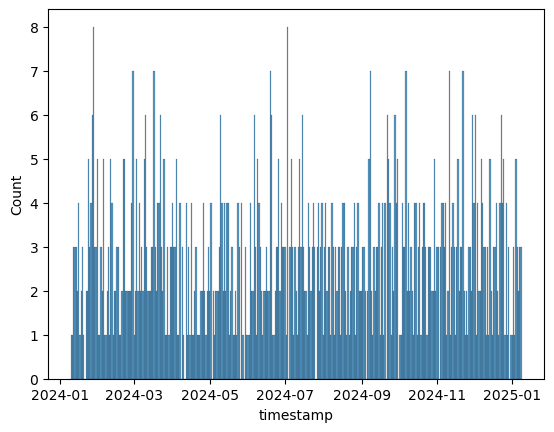

In [20]:
days = sessions['timestamp'].dt.date
sns.histplot(data=sessions, x=days)

In [21]:
user_activity_report = sv.analyze(sessions)
user_activity_report.show_html("user_activity_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report user_activity_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
recommendation_report = sv.analyze(recs)
recommendation_report.show_html("recommendation_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report recommendation_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
moderators_report = sv.analyze(recs)
moderators_report.show_html("moderators_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report moderators_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
get_column_names([recs,sessions,mods])

List of columns for DataFrame 1: ['recommendation_id', 'user_id', 'recommendation_type', 'click_through_rate', 'feedback_score']
List of columns for DataFrame 2: ['user_id', 'session_id', 'timestamp', 'session_length', 'messages_sent', 'feedback_rating', 'resources_clicked']
List of columns for DataFrame 3: ['moderator_id', 'chat_sessions_moderated', 'avg_response_time', 'user_satisfaction_score']


Let's look at the distribution of 
1. `click_through_rate`, `feedback_score` for recommendations
2. `session_length`, `messages_sent`, `feedback_rating`, `resources_clicked` for user sessions
3. `chat_sessions_moderated`, `avg_response_time`, `user_satisfaction_score` for moderators

## Gut check for anomalies

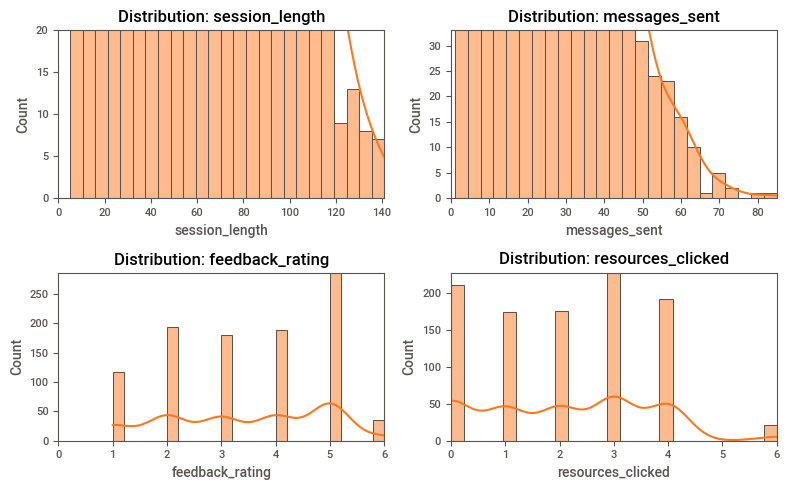

In [25]:
create_histplots(sessions, ['session_length', 'messages_sent', 'feedback_rating', 'resources_clicked'], 2, 2)

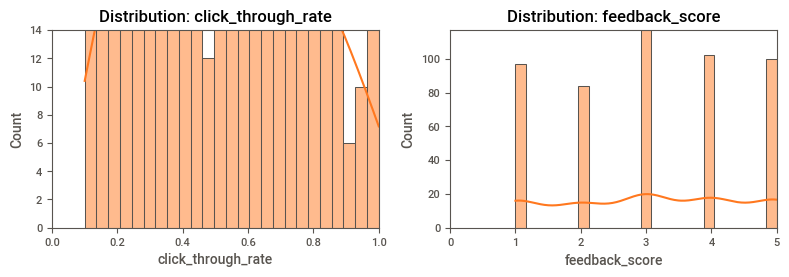

In [26]:
create_histplots(recs,['click_through_rate', 'feedback_score'],1,2)

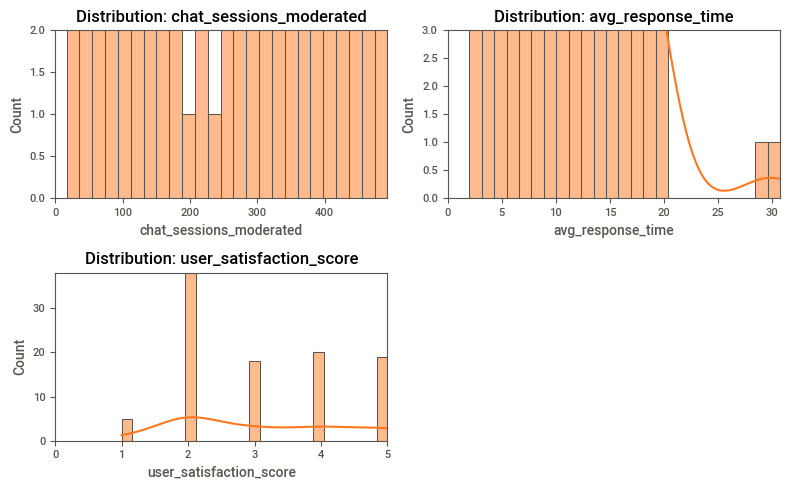

In [27]:
create_histplots(mods,['chat_sessions_moderated', 'avg_response_time', 'user_satisfaction_score'],1,3)

## User Activities

### Feedback rating vs. logged session length

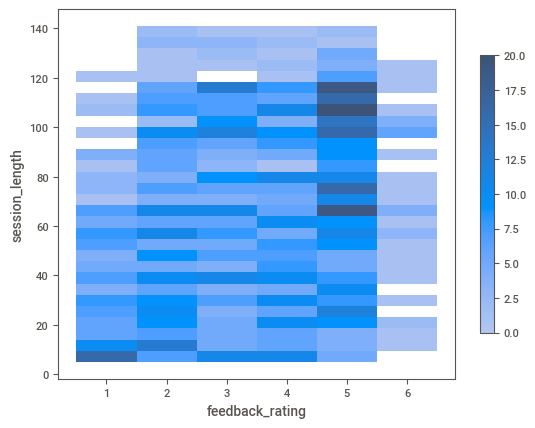

In [28]:
create_bivariate_histplot(sessions, "feedback_rating", "session_length", (True,False), (False,False))

We see that better experiences are correlated with longer sessions. A lot of users are around this cluster.

### Resources clicked vs. logged session length

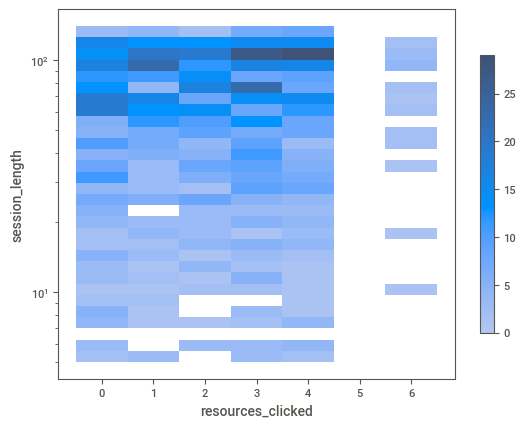

In [29]:
create_bivariate_histplot(sessions, "resources_clicked", "session_length", (True,False), (False,True))

Makes intuitive sense that the longer a user is in a session, the more resources they would click on. We'll investigate further later whether this necessarily mean effectiveness in terms of business success (CTR) and positive user experience (feedback).

### Feedback rating vs. resources clicked

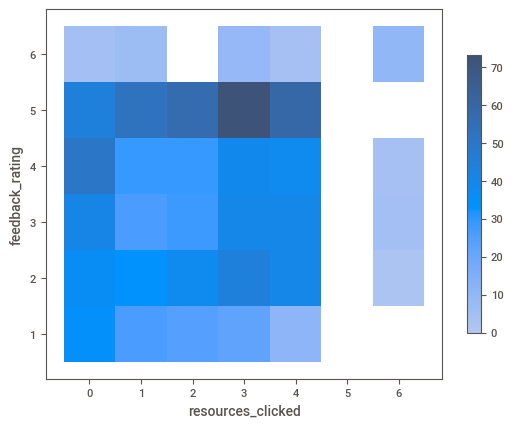

In [30]:
create_bivariate_histplot(sessions, "resources_clicked", "feedback_rating", (True,True), (False,False))

### Messages sent vs. resources clicked

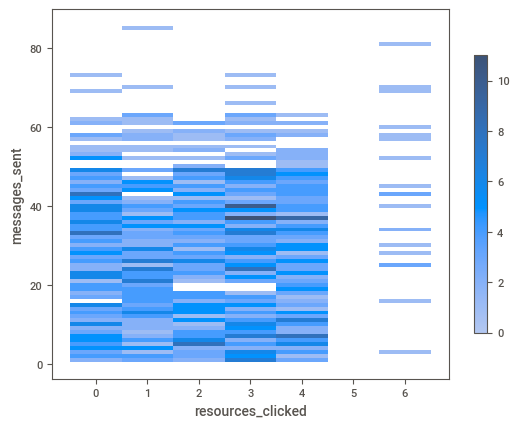

In [31]:
create_bivariate_histplot(sessions, "resources_clicked", "messages_sent", (True,True), (False,False))

### Messages sent vs. session length

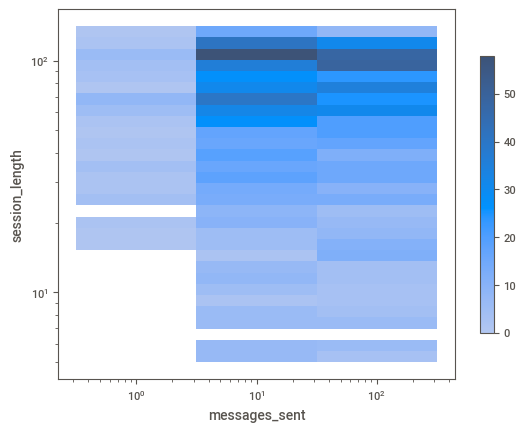

In [32]:
create_bivariate_histplot(sessions, "messages_sent", "session_length", (True, False), (True, True))

There is correlation between session length and messages sent. This should be the case by nature.

### Feedback rating vs. Messages sent

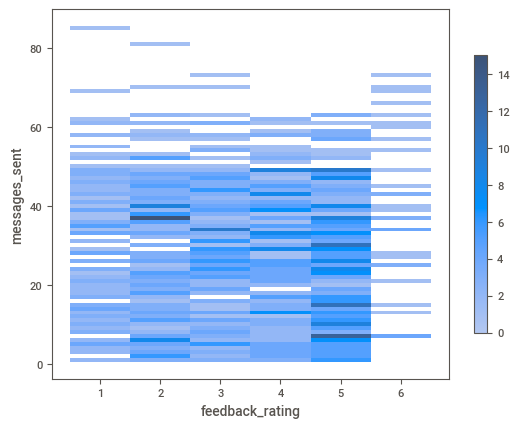

In [33]:
create_bivariate_histplot(sessions, "feedback_rating", "messages_sent", (True, True), (False, False))

### Changes in session length are most closely correlated with feedback based on our data. There's not a strong relationship between messages sent and user feedback. This makes intuitive sense, since users can send a lot of messages but not have enjoyed the experience and end up not staying for that long. 

## Moderators
Let's look like whether experience (`chat_sessions_moderated`) or response time yield better feedback for moderators. 

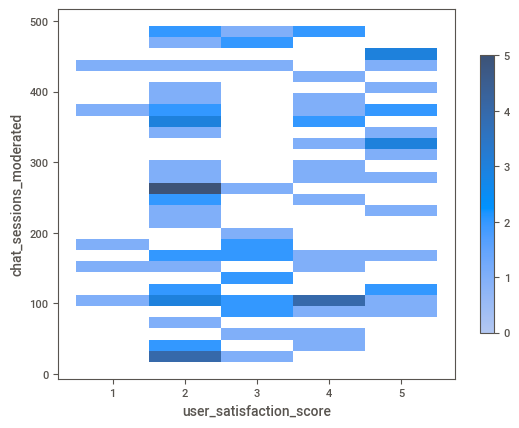

In [34]:
create_bivariate_histplot(mods, "user_satisfaction_score", "chat_sessions_moderated", (True, False), (False, False))

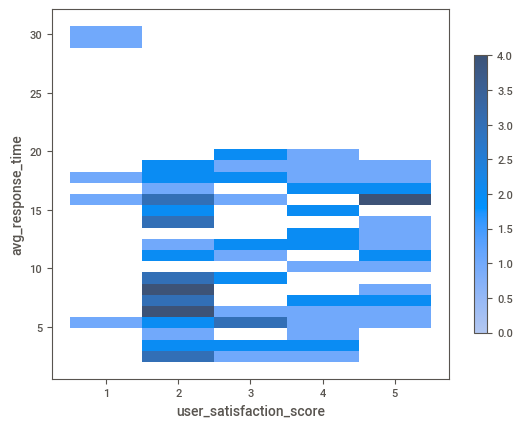

In [35]:
create_bivariate_histplot(mods, "user_satisfaction_score", "avg_response_time", (True, False), (False, False))

<AxesSubplot:xlabel='user_satisfaction_score', ylabel='avg_response_time'>

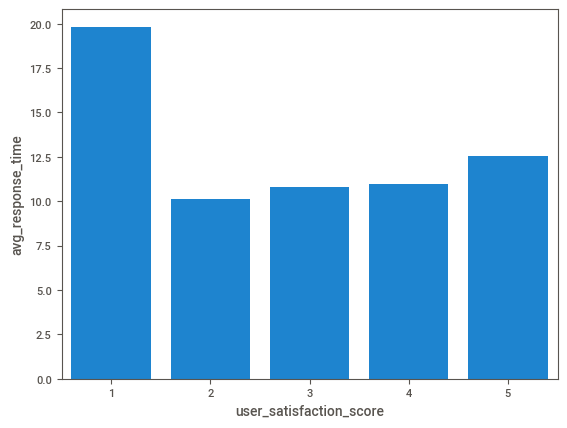

In [36]:
sns.barplot(data=mods, x="user_satisfaction_score", y="avg_response_time", errorbar=None)

<AxesSubplot:xlabel='user_satisfaction_score', ylabel='chat_sessions_moderated'>

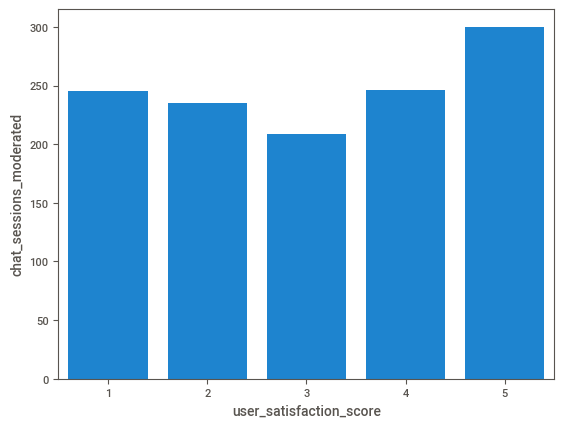

In [37]:
sns.barplot(data=mods, x="user_satisfaction_score", y="chat_sessions_moderated", errorbar=None)

Comparing the two, we can see that experience (chat sessions moderated) is more closely correlated with user satisfaction. Let's investigate further on the trend here.

Most moderators fall in the clusters identified above. In the future, we can develop clustering algorithms to understand the clusters. For now we can develop some heuristics to find high performers (4 or 5 satisfaction scores).

<AxesSubplot:xlabel='avg_response_time', ylabel='chat_sessions_moderated'>

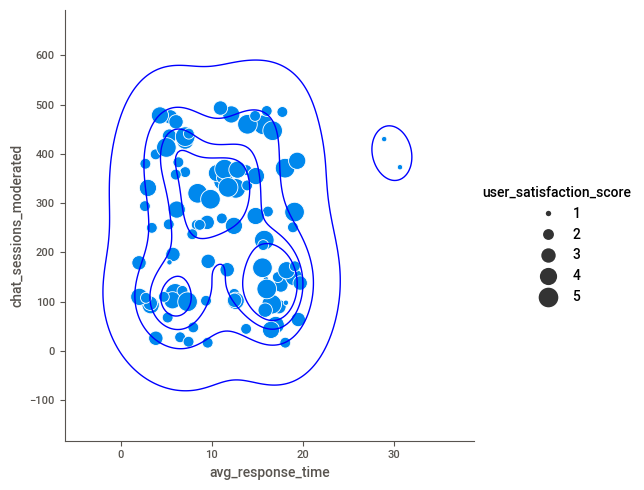

In [38]:
sns.relplot(data=mods, x="avg_response_time", y="chat_sessions_moderated",size="user_satisfaction_score", sizes=(15, 200))
sns.kdeplot(data=mods,x="avg_response_time", y="chat_sessions_moderated", levels=5, color="b", linewidths=1) # kernel density contouring

<AxesSubplot:xlabel='avg_response_time', ylabel='chat_sessions_moderated'>

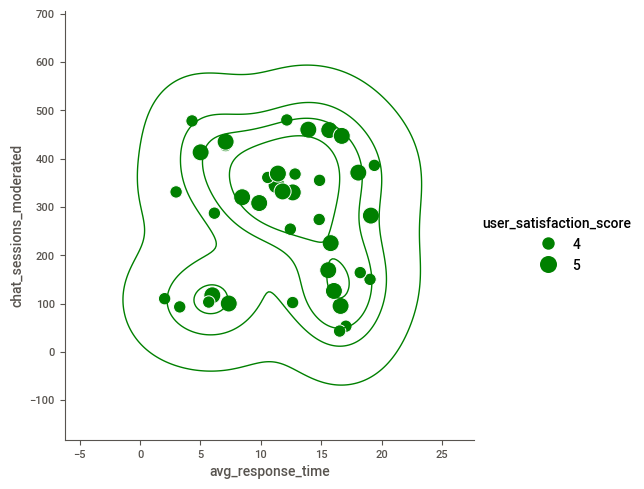

In [39]:
high_performers = mods[mods['user_satisfaction_score'].isin([4, 5])]
sns.relplot(data=high_performers, x="avg_response_time", y="chat_sessions_moderated",size="user_satisfaction_score", color="g",sizes=(80, 150))
sns.kdeplot(data=high_performers,x="avg_response_time", y="chat_sessions_moderated", levels=5, color="g", linewidths=1) # kernel density contouring

As we can see, high performers tend to have racked up a good amoung of experience, and they aren't necessarily the fastest to respond. Moving forward with moderator training, we can consider prioritizing moderators putting in more time, instead of rush to respond. This can include shadowing, reading chat history, etc.

## Activities + Recommendations


### Distributions throughout a day and a week
We want to discover some patterns of how time affects:
- amount of sessions
- session length (we won't investigate further here using messages sent, since it is closely related to session length, and we have previously found that session length is a stronger indicator of user satisfaction.)
- articles clicked on
- CTR for recommendations

This information can be very helpful operationally, as we estimate accordingly: 
- moderators needed (Peoples team)
- web app resource allocation (Engineering)
- NLP models and recommendation engine fine-tuning, batch and real time processing resource allocation (DS and engineering)

Ideally, we also have user-level frequency data to have more granular analyses on how each user participates.

This is fairly simple, we'll look at day and week separately. Running Hypotheses: more frequent sessions and longer session offwork hours and weekends; higher CTR for recommendations offwork hours, as well, with higher CTR for podcasts in weekday mornings.

For now, we'll going to assume that this sample only has users from EST timezone.

In [40]:
sessions['hour'] = sessions["timestamp"].dt.hour
sessions['day_of_week'] = define_ordered_day_of_week_column(sessions, "timestamp", "day_of_week")

user_joined['hour'] = user_joined["timestamp"].dt.hour
user_joined['day_of_week'] = define_ordered_day_of_week_column(sessions, "timestamp", "day_of_week")

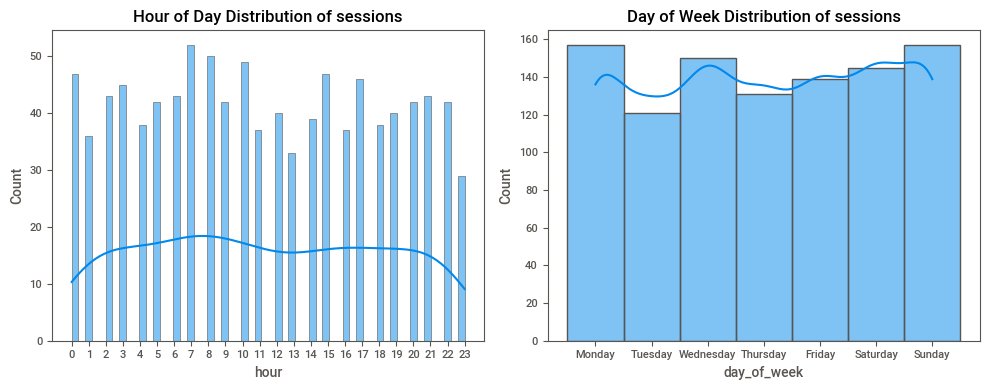

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=sessions, x="hour", ax=ax[0], binwidth=0.4, kde=True).set_xticks(range(24)) 
ax[0].set_title('Hour of Day Distribution of sessions')

sns.histplot(data=sessions, x="day_of_week", ax=ax[1], kde=True)
ax[1].set_title('Day of Week Distribution of sessions')

plt.tight_layout()
plt.show()

Here we can see that a lot of chatting happens on Sunday and Monday, potentially due to anxiety of going back to work. There are more sessions on Wednesdays than usual, which also make intuitive sense when we consider a common work week. 
On a daily basis, there's a surge of chats that happens around midnight (potentially due to sleep anxiety and being on the phone before bed), and then again at 7am (right before work), decling until after lunch, where we experience another surge in traffic, and then a smaller surge after dinner. 

What we can do:
- Fine tune recommendations:
    - Examples: recommend sleep hygiene related content at around midnight, workplace mental health topics on Wednesdays before work hours begin
- Moderators hiring and training:
    - According the topics that might be highly common during a certain period, the peoples team can look for moderators who are particularly experienced/passionate about these topics.
    - Knowing from previous analysis that moderators with more experiences perform better, we might consider training new moderators by asking to shadow high-performing moderators during high-traffic hours (around midnight, before work, and after meals) 

In [42]:
sessions_grouped_by_hour = sessions.groupby("hour").agg({"session_length": [np.mean, np.sum],
                                                         "resources_clicked": [np.mean, np.sum]})

sessions_grouped_by_day = sessions.groupby("day_of_week").agg({"session_length": [np.mean, np.sum],
                                                               "resources_clicked": [np.mean, np.sum]})

# note that we can analyze on a user level for hourly and daily CTR, and we should because otherwise we're only examining how the recommendations perform

user_joined_grouped_by_hour = user_joined.groupby(["user_id","hour"]).agg({"click_through_rate": np.mean})
user_joined_grouped_by_day = user_joined.groupby("day_of_week").agg({"click_through_rate": np.mean})

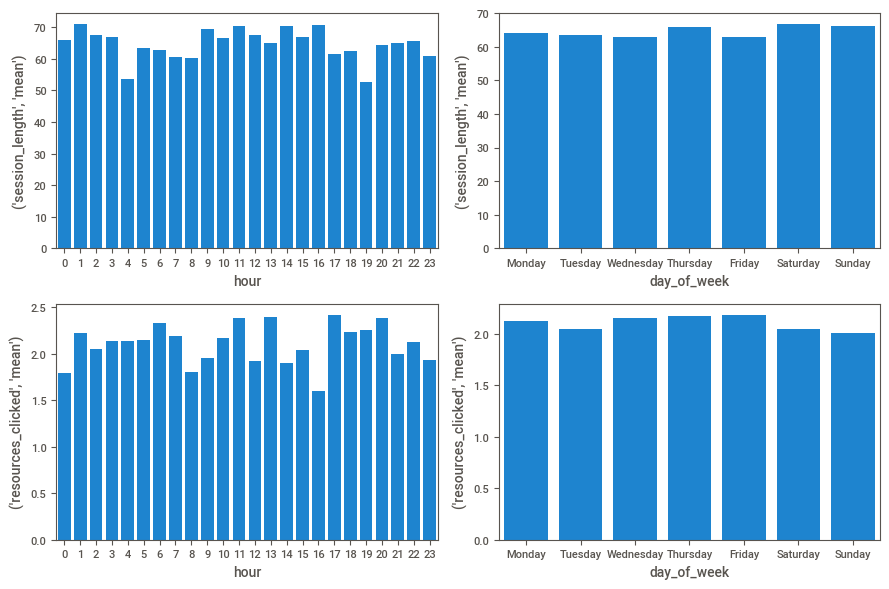

In [43]:
fig, ax = plt.subplots(2,2,figsize=(9, 6))

plt.subplot(2,2,1)
sns.barplot(data=sessions_grouped_by_hour, x="hour", y=("session_length", "mean")).set_xticks(range(24))
plt.subplot(2,2,2)
sns.barplot(data=sessions_grouped_by_day, x="day_of_week", y=("session_length", "mean"))
plt.subplot(2,2,3)
sns.barplot(data=sessions_grouped_by_hour, x="hour", y=("resources_clicked", "mean")).set_xticks(range(24)) 
plt.subplot(2,2,4)
sns.barplot(data=sessions_grouped_by_day, x="day_of_week", y=("resources_clicked", "mean"))

plt.tight_layout()
plt.show()

Although it seems that there's no apparent difference for weekdays vs. weekends, we can clearly see that, while sessions are often longer around midnight with a sharp decline at about 4am, users are more likely to consume content after lunch and dinner time.

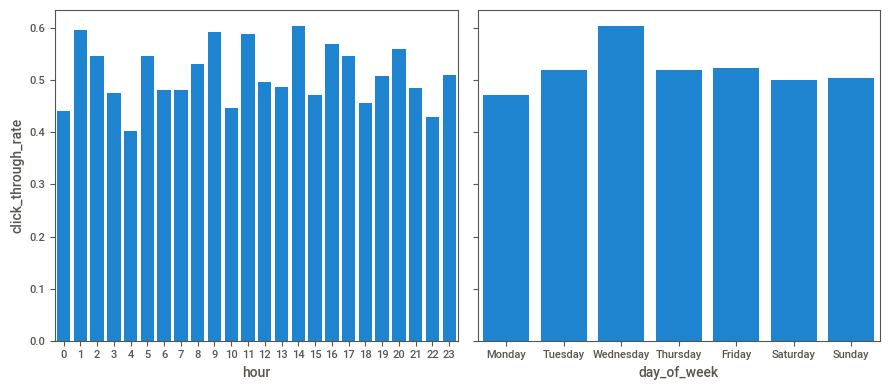

In [44]:
fig, ax = plt.subplots(1,2,figsize=(9, 4), sharey=True)

plt.subplot(1,2,1)
sns.barplot(data=user_joined_grouped_by_hour, x="hour", y="click_through_rate", errorbar=None).set_xticks(range(24))
plt.subplot(1,2,2)
sns.barplot(data=user_joined_grouped_by_day, x="day_of_week", y="click_through_rate")

plt.tight_layout()
plt.show()

We see that CTR trend throughout the day is similar to session length trend, surging at around midnight; and similar to resources clicked during each session, higher avg CTRs are exhibited for after-mean hours (instead of common out of office hours).
Revisiting our previous hypotheses, we see now that:
- there's a surge in CTR after lunch 1-2pm and after dinner 7-8pm
- contrary to our hypothesis, there's not a lot of differences between weekdays and weekends. However, Wednesday seems to be the best day in terms of CTR.

What we can do is:
- prioritize resources allocation for these timeframes 
- piggybacking on previous suggestions, since sessions are longer at around midnight and after lunch hours peoples team can consider focusing more on overseas moderators, or indicating some mandatory hours to seek moderators whose schedule might allow them to be more available during these hours.

### logged correlation between session length and recommendation CTR

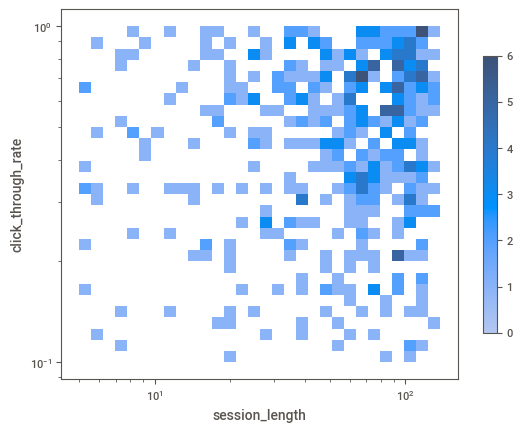

In [45]:
create_bivariate_histplot(user_joined, "session_length", "click_through_rate", (False, False), (True, True))

### Click through rate, and whether it's necessarily a sign that users are satisfied.
Here we'll assume that the feedback score is for relevancy of the recommendation. 

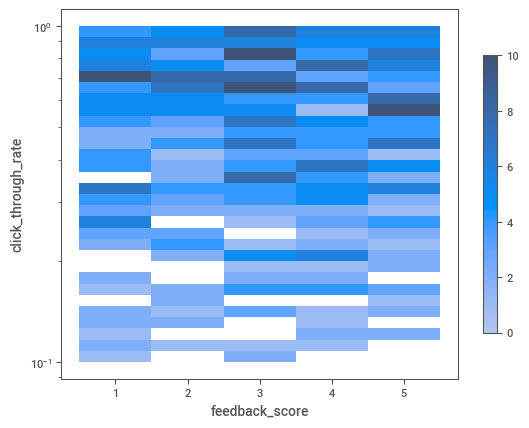

In [46]:
create_bivariate_histplot(user_joined, "feedback_score", "click_through_rate", (True, False), (False, True))

We can see here that high CTR doesn't necessarily mean that the content is relevant. 

### Cross referencing recommendation feedback and resources clicked in chat

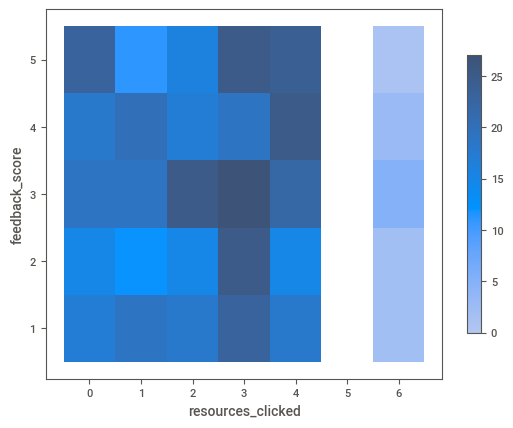

In [47]:
create_bivariate_histplot(user_joined, "resources_clicked", "feedback_score", (True, True), (False, False))

# Feature Engineering

### What types of media has highest CTR / feedback from users?

From the above two plots, we see that neither CTR nor number of resources viewed is strongly linked to how users find the recommendation relevant. Depending on our priorities, we can choose to optimize:
1. Click through rate for direct business outcomes (partnerships with hospitals, insurance, and other healthcare organizations to give exposure for their content)
2. Enhancing user experience

With this we move on to make some new features for the joined dataset. 

Features
- "eye catcher": for every user in recs, we define the eye_catcher recommendation as the type of resources that gets the highest click-hrough rate
    - this can be used for users who are more engaged in chats but maybe have low resources clicked 
- "favorite recommendation": for every user in recs, we define their favorite recommendation as the one that were rated highest - this tell us what to recommend further and can be used to re-train/add to our recommender
    - this can be used for users who click on a lot of resources

In [48]:
# rank recommendation type by click through rate, remembering that we have previously checked that each user and recommendation type combo is unique
user_joined['rank_by_rec_type'] = user_joined.groupby('user_id')['click_through_rate'].rank(ascending=False).astype(int)
# rank by feedback
user_joined['rank_by_feedback'] = user_joined.groupby('user_id')['feedback_score'].rank(ascending=False).astype(int)

# create columns for preferences
eye_catchers = user_joined.loc[user_joined['rank_by_rec_type']==1]
eye_catchers['eye_catcher'] = eye_catchers['recommendation_type']

favorites = user_joined.loc[user_joined['rank_by_feedback']==1]
# if two recommendation types are equally as appreciated by the user, we combine the two (split in the future if needed)
favorites['favorite'] = (favorites
                         .groupby(['user_id','rank_by_feedback'])['recommendation_type']
                         .transform(lambda x: ', '.join(x) if len(x) > 1 else next(iter(x), '')))                      
favorites = favorites.drop_duplicates(subset=['user_id','favorite'])

# join two dataframes with new features
user_preferences = pd.merge(eye_catchers[['user_id','eye_catcher']], favorites[['user_id','favorite']], how="inner", left_on="user_id", right_on="user_id")

C:\Users\alven\AppData\Local\Temp\ipykernel_396\1532944290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_catchers['eye_catcher'] = eye_catchers['recommendation_type']
C:\Users\alven\AppData\Local\Temp\ipykernel_396\1532944290.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favorites['favorite'] = (favorites


In [49]:
user_preferences

,user_id,eye_catcher,favorite
0,75c93e70-8082-484b-a0b6-4ea590bddcb0,Blog,Blog
1,264c18df-cf41-49fd-9bd9-9f17b9e68549,Video,Video
2,159c0665-af87-480f-b073-c36c031f5ac6,Video,Video
3,826862c1-3e22-4c66-8be3-25be40a02ee5,Podcast,Podcast
4,5d6ee8d9-45b2-4089-a2d1-eda0f269fea6,Blog,Video
...,...,...,...
389,9a79025a-1c68-466c-b8db-480ad4746186,Podcast,"Podcast, Video"
390,7d3b1c5a-b30b-4695-924e-5a2bec44e7c6,Video,Video
391,56f4baa9-bcb0-4921-a213-f117a1ab3c8c,Video,Video
392,a0652390-3c0f-4c36-8d6c-7c85ce58baf7,Podcast,Podcast


Next steps:
- we can one-hot encode eye_catcher and favorite and use the new dataset to train a recommender.